# Autoencoders

## Theory


An autoencoder is an artificial neural network that is made up of two main parts:

* Encoder: This part is responsible for reducing the dimensionality of the input data. That is, it takes the entire image and transforms it into a more compact representation, such as a vector of numbers.
* Decoder: This part does the reverse job. Take the compressed representation and try to reconstruct the original image as closely as possible.

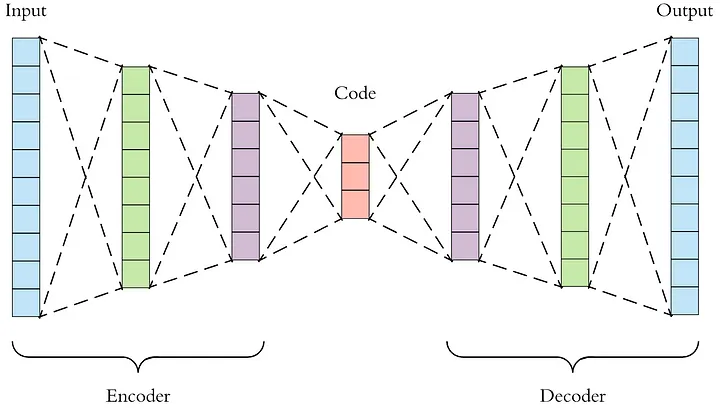

*  **EMBEDDINGS**: An embedding is a dense numerical representation of objects or concepts in a lower-dimensional vector space. Imagine that you have a dictionary of words. Each word could be represented as a single vector in a multidimensional space. This vector, or embedding, captures the semantic and syntactic relationships between words.

* **EMBEDDING SPACE**: An embedding space is the mathematical environment where embeddings are represented. Imagine that each embedding is a point on a multidimensional map. This map is the embeddings space.

Why is this space important?

* Semantic relationships: The closeness between two points (embeddings) in this space indicates a semantic relationship between the words or concepts they represent. For example, in a well-trained embedding space, the words "dog" and "cat" will be closer to each other than "dog" and "car."
* Vector operations: We can perform mathematical operations on the embeddings. For example, we can calculate the analogy "king is to woman as man is to X" by finding the vector that most closely resembles (vector of "woman") - (vector of "man") + (vector of "king").
* Visualization: Although embedding spaces usually have many dimensions, we can use dimensionality reduction techniques to visualize them in 2 or 3 dimensions. This allows us to visually explore the relationships between words.

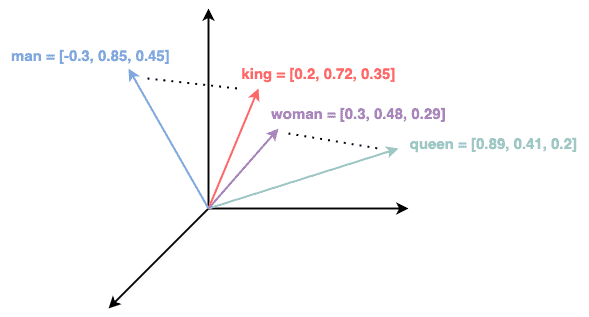

## Practical Example

### Import MNIST dataset

In [15]:
from tensorflow.keras import (
    layers,
    models,
    datasets,
    callbacks,
    losses,
    optimizers,
    metrics,
    )

import numpy as np
import tensorflow as tf
from keras import layers, models
from scipy.stats import norm

(x_train, y_train),(x_test, y_test) = datasets.fashion_mnist.load_data()

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [17]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)


(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


### Preprocessing

Normalizing data -> each pixel has values between 0-255 -> after normalization, data will be in range [0,1]

* Avoid bursting or fading gradient problems: When pixel values ​​are in a large range, such as 0-255, gradients during training can become very large or very small, making learning difficult. Normalizing the data to a smaller range helps prevent these problems.
* Improves convergence: Normalizing data can help the network converge more quickly toward an optimal solution.
* Easier to interpret: Normalized values ​​between 0 and 1 are easier to interpret than original values ​​in the range 0-255.



In [18]:
def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    imgs = np.expand_dims(imgs, -1)
    return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

### Encoder

In [19]:
encoder_input = layers.Input(shape=(32, 32, 1), name="encoder_input")

x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(encoder_input)
x = layers.Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]

x = layers.Flatten()(x)
encoder_output = layers.Dense(2, name="encoder_output")(x)


In [ ]:
encoder = models.Model(encoder_input, encoder_output)

In [ ]:
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

### Decoder

In [ ]:
decoder_input = layers.Input(shape=(2,), name="decoder_input")

# Conectar la entrada a una capa densa
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)

# Reshapear este vector en un tensor que pueda ser alimentado
# como entrada a la primera capa Conv2DTranspose
x = layers.Reshape(shape_before_flattening)(x)

# Apilar capas Conv2DTranspose una encima de la otra
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)

# Capa de salida del decodificador
decoder_output = layers.Conv2D(1, (3, 3), strides=1, activation='sigmoid', padding='same', name='decoder_output')(x)

# Crear el modelo del decodificador
decoder = models.Model(decoder_input, decoder_output)

In [ ]:
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Conv2D)              │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

### Autoencoder

In [ ]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

The BCE is used in combination in image reconstruction tasks, where the objective is for the output of the autoencoder to be as similar as possible to the input. By calculating the difference between the true class probability and the predicted probability for each pixel, BCE heavily penalizes incorrect predictions, encouraging more accurate reconstruction.

#### Training autoencoder

In [ ]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=5,
    batch_size=100,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 228s 360ms/step - loss: 0.3561 - val_loss: 0.2622
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 248s 337ms/step - loss: 0.2597 - val_loss: 0.2573
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 272s 354ms/step - loss: 0.2549 - val_loss: 0.2554
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 260s 351ms/step - loss: 0.2527 - val_loss: 0.2525
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 206s 343ms/step - loss: 0.2503 - val_loss: 0.2513


#### Testing autoencoder

In [ ]:
example_images = x_test[:5000]
predictions = autoencoder.predict(example_images)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


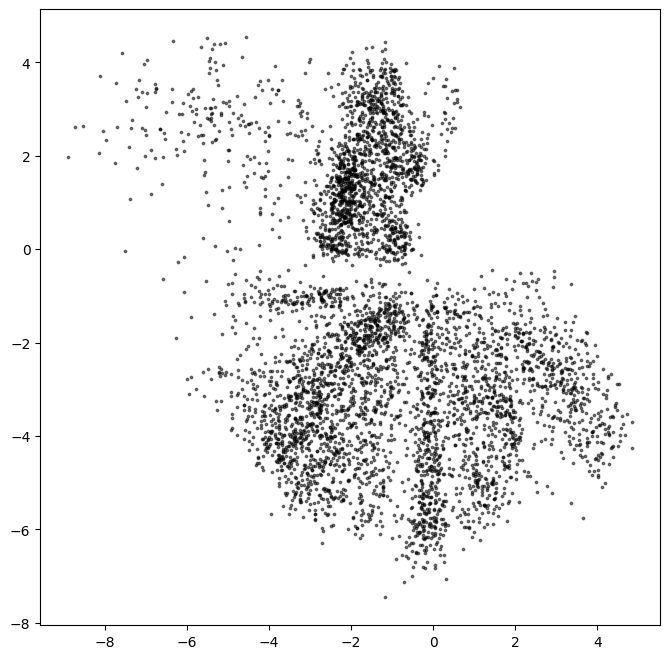

In [ ]:
import matplotlib.pyplot as plt
embeddings = encoder.predict(example_images)

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

### Generating new images using the decoder


In [ ]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(18, 2))
reconstructions = decoder.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


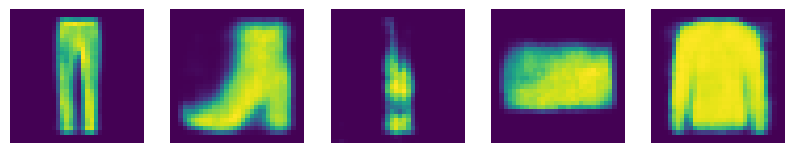

In [ ]:
num_images = 5

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(1, num_images, figsize=(10, 4))

# Iterar sobre las imágenes reconstruidas y mostrarlas
for i in range(num_images):
    image = reconstructions[i] / np.max(reconstructions)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

# Variational Autoencoders

## Theory


Variational Autoencoders (VAEs) are an extension of autoencoders that introduce a probabilistic element. Instead of assigning each input to a fixed point in the latent space, VAEs assign a probability distribution (typically a Gaussian) to each input. This means that for the same input, the VAE can generate multiple latent representations, which gives it greater flexibility and generalization capacity.

The main difference is in how they represent information in the latent space. AEs use a deterministic representation (a fixed point), while VAEs use a probabilistic representation (a distribution).

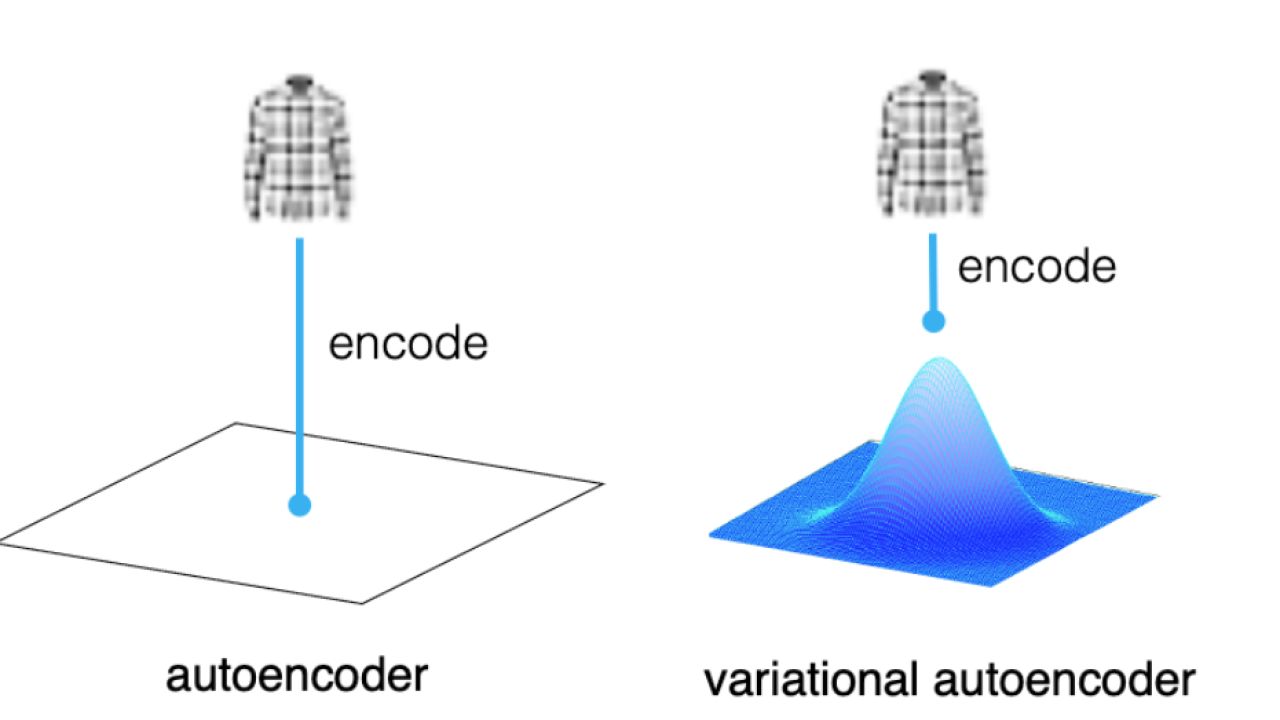

* Probabilistic representation: VAEs capture uncertainty and variability in the data. This allows them to generate new data that is similar to the training data, but not identical.
* Flexibility: By representing information as a distribution, VAEs are more flexible and can adapt to different types of data.
* Interpretability: The latent distribution of a VAE can provide valuable information about the underlying structure of the data.

## Practical Example - VAE

In [20]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [21]:
IMAGE_SIZE = 32
BATCH_SIZE = 100
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 5
BETA = 500

### Encoder

In [22]:
# Encoder
encoder_input = layers.Input(
    shape=(IMAGE_SIZE, IMAGE_SIZE, 1), name="encoder_input"
)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(
    encoder_input
)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]  # the decoder will need this!

x = layers.Flatten()(x)
z_mean = layers.Dense(EMBEDDING_DIM, name="z_mean")(x)
z_log_var = layers.Dense(EMBEDDING_DIM, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(encoder_input, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input             │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 32)     │            320 │ encoder_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 8, 8, 64)       │         18,496 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 4, 4, 128)      │         73,856 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 2048)           │              0 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │          4,098 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │          4,098 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling_1 (Sampling)     │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,868 (394.02 KB)

 Trainable params: 100,868 (394.02 KB)

 Non-trainable params: 0 (0.00 B)

* Input layer: Receives 32x32 size images with a single channel (probably grayscale images).
* Convolutional layers:
conv2d_12, conv2d_13 and conv2d_14: These layers extract image features through convolutions. Each layer reduces the spatial size of the image (stride = 2) and increases the number of channels, meaning that more abstract features are captured as we move down the network.
* Flattening layer: flatten_2: Converts the output of the last convolutional layer into a one-dimensional vector, preparing the data for the dense layers.
* Dense layers:
1. z_mean: Calculates the mean of the normal distribution that represents the latent space.
2. z_log_var: Calculates the log variance of the normal distribution. These two layers together define the normal distribution that characterizes the latent space.
* Sampling layer: sampling_1: Using the mean and logarithmic variance, this layer generates random samples from the latent space. These samples are used to reconstruct the original input in the decoder.

Unlike an autoencoder, the VAE does not assign a single point in latent space to the image. Instead, it defines a probability distribution over that space. This distribution is characterized by two vectors:
* Mean (z_mean): Indicates the center of the distribution.
* Logarithmic variance (z_log_var): Determines the dispersion of the distribution.

* Interpretation of the distribution: This distribution tells us that the image could be represented by any point within that region of latent space, with greater probability in areas close to the mean and lower probability in more distant areas.

What is the role of sampling?

* Introduction of randomness: Sampling allows us to select a random point within this distribution. Each time we sample, we get a different point in the latent space, even though they are all related to the original image.
* Generation of new samples: By decoding these sampled points, we obtain new images that are similar to the original image, but with small variations. These variations are due to the randomness introduced by sampling.
* Exploring latent space: Sampling allows us to explore the entire latent space, not just the most probable points. This is essential for tasks such as generating new images and interpolating between images.

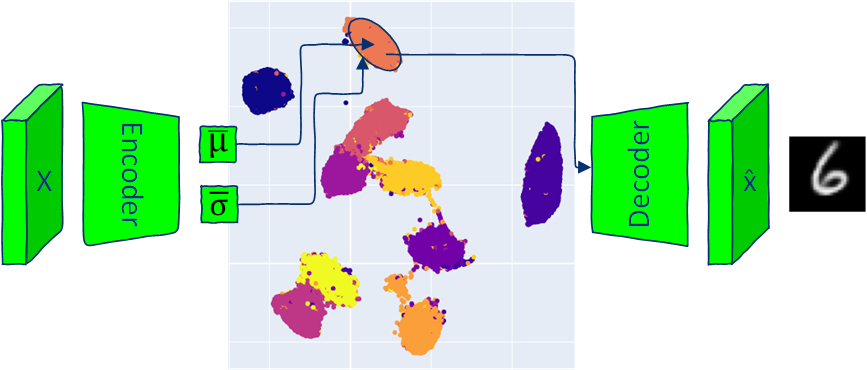

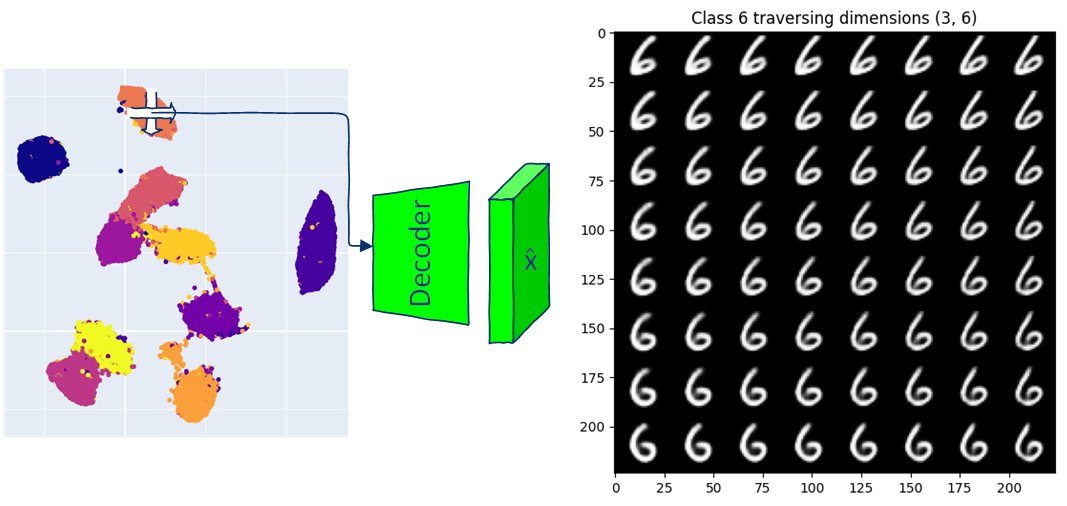

### Decoder

In [23]:
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(
    128, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    64, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    32, (3, 3), strides=2, activation="relu", padding="same"
)(x)
decoder_output = layers.Conv2D(
    1,
    (3, 3),
    strides=1,
    activation="sigmoid",
    padding="same",
    name="decoder_output",
)(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Conv2D)              │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        """Call the model on a particular input."""
        z_mean, z_log_var, z = encoder(inputs)
        reconstruction = decoder(z)
        return z_mean, z_log_var, reconstruction

    def train_step(self, data):
        """Step run during training."""
        with tf.GradientTape() as tape:
            z_mean, z_log_var, reconstruction = self(data)
            reconstruction_loss = tf.reduce_mean(
                BETA
                * losses.binary_crossentropy(
                    data, reconstruction, axis=(1, 2, 3)
                )
            )
            kl_loss = tf.reduce_mean(
                tf.reduce_sum(
                    -0.5
                    * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)),
                    axis=1,
                )
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        """Step run during validation."""
        if isinstance(data, tuple):
            data = data[0]

        z_mean, z_log_var, reconstruction = self(data)
        reconstruction_loss = tf.reduce_mean(
            BETA
            * losses.binary_crossentropy(data, reconstruction, axis=(1, 2, 3))
        )
        kl_loss = tf.reduce_mean(
            tf.reduce_sum(
                -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)),
                axis=1,
            )
        )
        total_loss = reconstruction_loss + kl_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [25]:
vae = VAE(encoder, decoder)


#### Training VAE

In [26]:
optimizer = optimizers.Adam(learning_rate=0.0005)
vae.compile(optimizer=optimizer)

In [29]:
# # Create a model save checkpoint
# model_checkpoint_callback = callbacks.ModelCheckpoint(
#     filepath="./checkpoint",
#     save_weights_only=False,
#     save_freq="epoch",
#     monitor="loss",
#     mode="min",
#     save_best_only=True,
#     verbose=0,
# )
# tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [28]:
vae.fit(
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test),
    #callbacks=[model_checkpoint_callback, tensorboard_callback],
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 205s 334ms/step - kl_loss: 3.6694 - reconstruction_loss: 193.6233 - total_loss: 197.2927 - val_kl_loss: 5.0314 - val_loss: 140.4097 - val_reconstruction_loss: 135.3783
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 201s 336ms/step - kl_loss: 5.0223 - reconstruction_loss: 131.6323 - total_loss: 136.6546 - val_kl_loss: 5.1930 - val_loss: 138.7743 - val_reconstruction_loss: 133.5812
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 200s 333ms/step - kl_loss: 5.0254 - reconstruction_loss: 129.6910 - total_loss: 134.7164 - val_kl_loss: 5.1209 - val_loss: 136.9899 - val_reconstruction_loss: 131.8691
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 202s 332ms/step - kl_loss: 5.0562 - reconstruction_loss: 128.4125 - total_loss: 133.4687 - val_kl_loss: 5.2502 - val_loss: 135.8164 - val_reconstruction_loss: 130.5663
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 201s 330ms/step - kl_loss: 5.0932 - reconstruction_loss: 127.7760 - total_loss: 132.8692 - val_kl_loss: 5.1821 - val_loss: 135.3124 -

In [31]:
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

In [32]:
z_mean, z_log_var, reconstructions = vae.predict(example_images)
print("Example real clothing items")
display(example_images)
print("Reconstructions")
display(reconstructions)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
Example real clothing items


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

Reconstructions


array([[[[8.31185716e-08],
         [1.58837699e-09],
         [1.75282935e-08],
         ...,
         [1.79653292e-09],
         [1.34013725e-08],
         [1.13177930e-05]],

        [[1.88184535e-09],
         [2.81265913e-11],
         [2.28710539e-09],
         ...,
         [5.07637099e-10],
         [3.81239618e-09],
         [1.08910615e-06]],

        [[8.66309691e-09],
         [4.66947536e-10],
         [7.71990258e-08],
         ...,
         [6.61144270e-07],
         [4.15830726e-07],
         [6.91448986e-06]],

        ...,

        [[3.81110397e-08],
         [1.02201074e-08],
         [1.23297752e-06],
         ...,
         [2.97349459e-07],
         [1.00056113e-07],
         [5.83440669e-06]],

        [[2.51649883e-08],
         [1.01268860e-09],
         [4.98839619e-08],
         ...,
         [3.57879304e-09],
         [8.52958681e-09],
         [1.25951226e-06]],

        [[2.18701334e-05],
         [2.06529512e-06],
         [7.67133497e-06],
         ...,
 

In [33]:
z_mean, z_var, z = encoder.predict(example_images)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [34]:
print(z[:10])


[[ 1.3310066   0.09439391]
 [-0.27380756  0.6754992 ]
 [-2.7185013   0.15180533]
 [-2.208322   -1.1153898 ]
 [-0.00593372 -0.21566963]
 [-2.0907643   0.07132891]
 [-0.15573955 -1.536451  ]
 [-0.1713314  -0.6690432 ]
 [ 1.175003   -2.8340788 ]
 [ 1.03603    -1.5812092 ]]


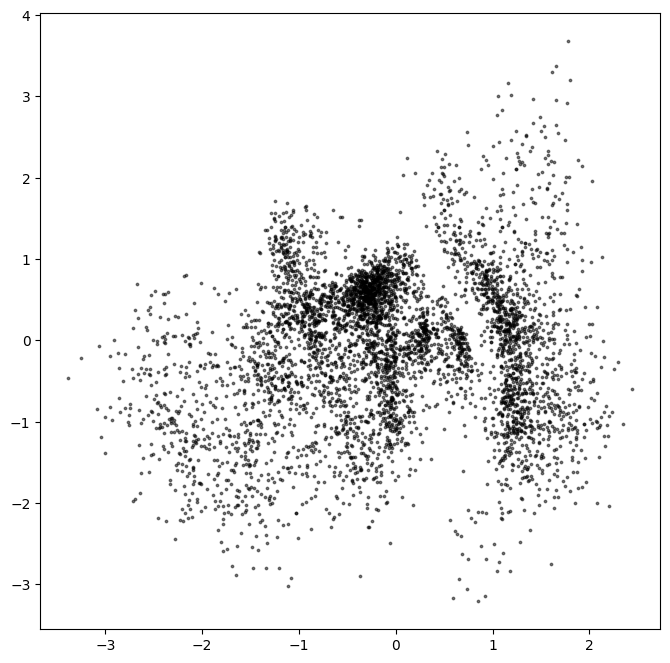

In [36]:
# Show the encoded points in 2D space
import matplotlib.pyplot as plt

figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(z[:, 0], z[:, 1], c="black", alpha=0.5, s=3)
plt.show()

### Generating new images using the decoder


In [37]:
# Sample some points in the latent space, from the standard normal distribution
grid_width, grid_height = (6, 3)
z_sample = np.random.normal(size=(grid_width * grid_height, 2))

In [38]:
reconstructions = decoder.predict(z_sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [39]:
p = norm.cdf(z)
p_sample = norm.cdf(z_sample)

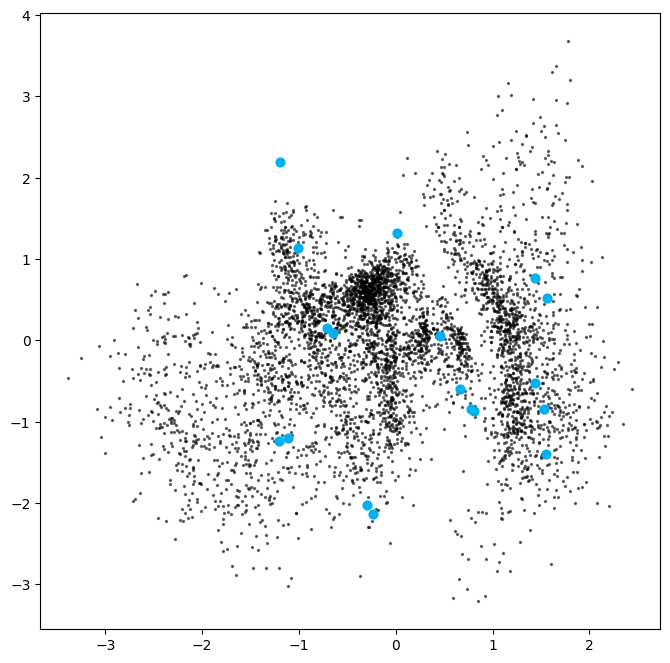

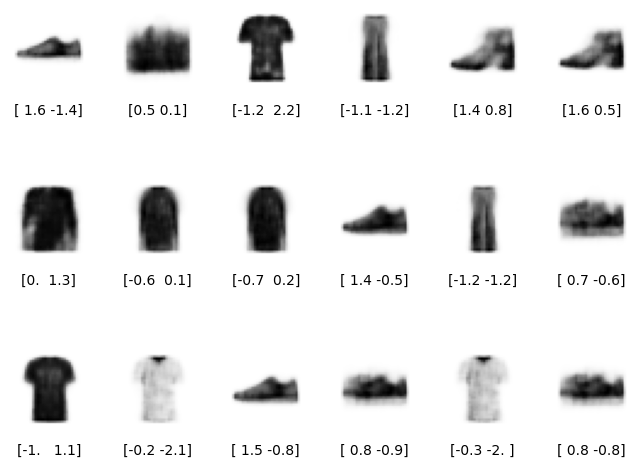

In [40]:
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... the original embeddings ...
plt.scatter(z[:, 0], z[:, 1], c="black", alpha=0.5, s=2)

# ... and the newly generated points in the latent space
plt.scatter(z_sample[:, 0], z_sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# Add underneath a grid of the decoded images
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        str(np.round(z_sample[i, :], 1)),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

### Exploring latent space

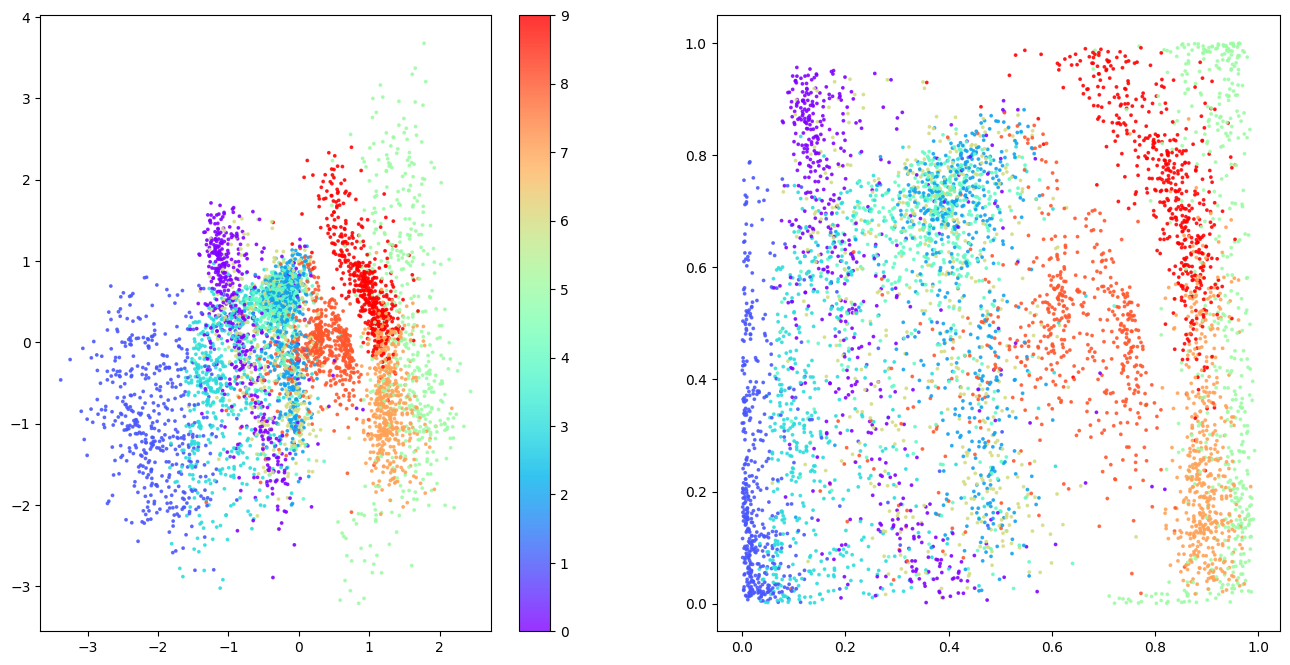

In [41]:
figsize = 8
fig = plt.figure(figsize=(figsize * 2, figsize))
ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(
    z[:, 0], z[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3
)
plt.colorbar(plot_1)
ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(
    p[:, 0], p[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3
)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


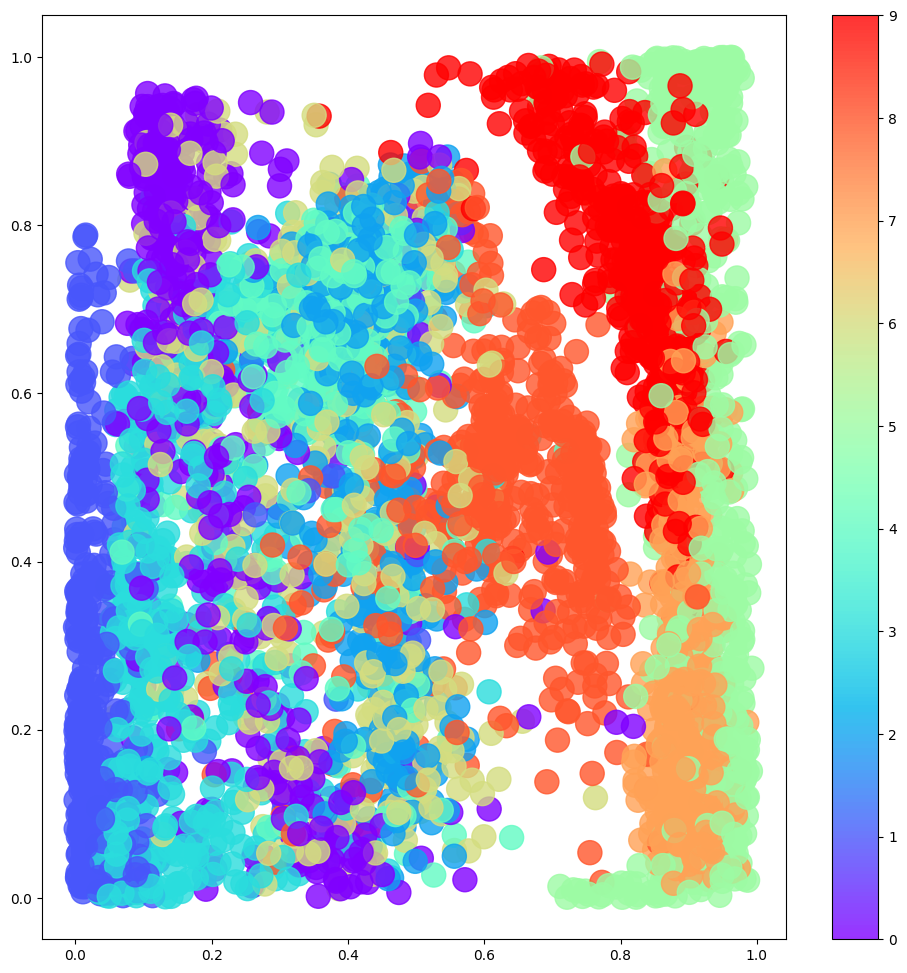

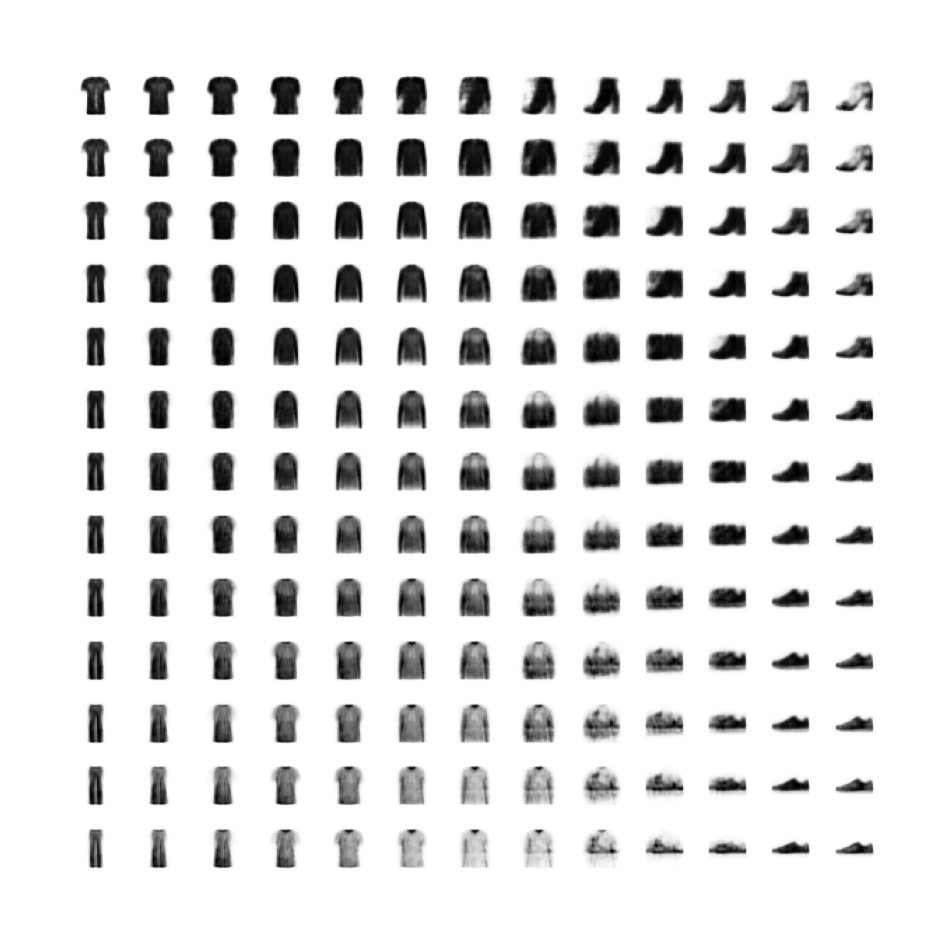

In [42]:
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    p[:, 0], p[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=300
)
plt.colorbar()

x = norm.ppf(np.linspace(0, 1, grid_size))
y = norm.ppf(np.linspace(1, 0, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")